In [1]:
import matplotlib.pyplot as plt
import networkx as nx

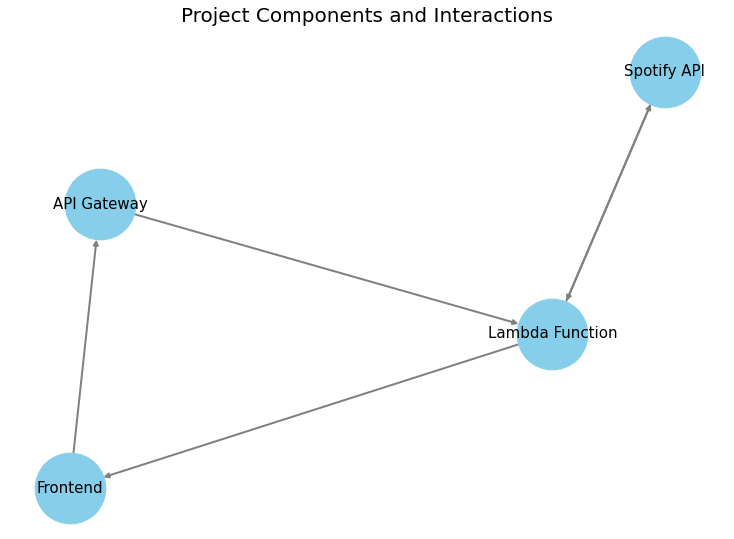

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

# Nodes
G.add_node("Frontend", color='lightblue')
G.add_node("API Gateway", color='lightgreen')
G.add_node("Lambda Function", color='lightgreen')
G.add_node("Spotify API", color='lightcoral')

# Edges representing the interactions between components
edges = [("Frontend", "API Gateway"),
         ("API Gateway", "Lambda Function"),
         ("Lambda Function", "Spotify API"),
         ("Spotify API", "Lambda Function"),
         ("Lambda Function", "Frontend")]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
colors = [G.nodes[node]['color'] for node in G.nodes]

plt.figure(figsize=(12, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=3000)
# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
# Draw edge labels
edge_labels = {
    ("Frontend", "API Gateway"): "HTTP request",
    ("API Gateway", "Lambda Function"): "Invoke",
    ("Lambda Function", "Spotify API"): "API Call",
    ("Spotify API", "Lambda Function"): "Response"
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='lightblue', lw=4, label='Frontend Component'),
    Line2D([0], [0], color='lightgreen', lw=4, label='AWS Services'),
    Line2D([0], [0], color='lightcoral', lw=4, label='External Service (Spotify API)')
]
plt.legend(handles=legend_elements, loc="upper left")

plt.title("Project Architecture Flow")
plt.axis('off')
plt.tight_layout()
plt.show()
